## Exploratory Data Analisys
### Topic (**Currency Exchange**) according to news portal

### Load
Data

In [31]:
import pandas as pd
import numpy as np
import pickle

In [32]:
data = pickle.load(open('data/df_clean_izq.pkl','rb'))

In [33]:
ex_izq = data.loc[data.topics == 'exchange']
ex_izq.shape

(26, 7)

In [34]:
data = pickle.load(open('data/df_clean_der.pkl','rb'))

In [35]:
ex_der = data.loc[data.topics == 'exchange']
ex_der.shape

(30, 7)

Tokens

In [36]:
tokens_izq = pd.read_pickle('tokens/topic_tokens_izq_new.pkl')
tokens_der = pd.read_pickle('tokens/topic_tokens_der_new.pkl')

In [37]:
tokens_izq_ex = tokens_izq[tokens_izq.topics == 'exchange'].drop('topics', axis=1)

In [38]:
tokens_der_ex = tokens_der[tokens_der.topics == 'exchange'].drop('topics', axis=1)

### Versus

#### Length
How many words?

In [39]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
import unidecode

In [40]:
stopwords_sp = stopwords.words('spanish')

In [41]:
def tokenizer(texto):

    alphanumeric = re.sub(r'([^\s\w]|_)+', '', texto).lower()
    no_accents = unidecode.unidecode(alphanumeric)
    
    tockens = word_tokenize(no_accents)
    
    tockens_clean = [tocken for tocken in tockens if tocken not in stopwords_sp and tocken.isalpha()]
    
    terminos = tockens_clean

    return terminos

In [42]:
words_izq = [tokenizer(documento) for documento in ex_izq.body.values]
words_der = [tokenizer(documento) for documento in ex_der.body.values]

In [43]:
def average_words(docs):
    words = sum([len(doc) for doc in docs])
    return round(words / len(docs), 2)

print(f"Izquierda Diario: {average_words(words_izq)} average words per document.")
print(f"Derecha Diario: {average_words(words_der)} average words per document.")

Izquierda Diario: 162.23 average words per document.
Derecha Diario: 280.8 average words per document.


#### Lexicon
How many unique words?

In [44]:
def average_uniques(docs):
    avg = []
    for doc in docs:
        avg.append(len(set(doc)) / len(doc))
    return round(sum(avg) / len(docs), 2)

In [45]:
print(f"Izquierda Diario: {average_uniques(words_izq)} average unique words per document.")
print(f"Derecha Diario: {average_uniques(words_der)} average unique words per document.")

Izquierda Diario: 0.82 average unique words per document.
Derecha Diario: 0.78 average unique words per document.


### Clouds
Word count per corpus

In [46]:
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt

In [47]:
def count_words(df):
    top_words = {}
    for column in df.transpose().columns:
        top = df.transpose()[column].sort_values(ascending=False).head(30)
        top_words[column] = list(zip(top.index, top.values))
    return top_words

In [48]:
top_words_izq = count_words(tokens_izq_ex)

In [49]:
words_izq = [word for docs, w_counts in top_words_izq.items() for word in list(word for word, num in w_counts)]

In [50]:
top_words_der = count_words(tokens_der_ex)

In [51]:
words_der = [word for docs, w_counts in top_words_der.items() for word in list(word for word, num in w_counts)]

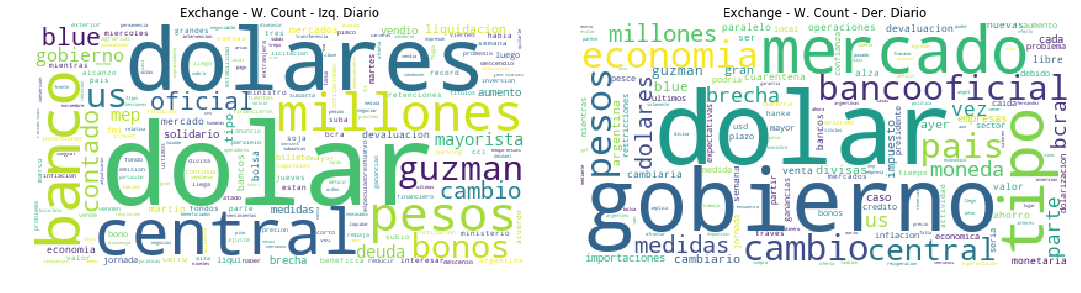

In [52]:
fig, axes = plt.subplots(nrows=1, ncols=2, constrained_layout=True, figsize=(15,30))

cloud = WordCloud(background_color='white')

titles = ['Exchange - W. Count - Izq. Diario', 'Exchange - W. Count - Der. Diario']

for words, ax, title in zip([words_izq, words_der], axes.flatten(), titles):
    cloud.generate_from_frequencies(dict(Counter(words).most_common()))
    ax.imshow(cloud)
    ax.set_title(title)
    ax.axis('off')
    
plt.show()

#### TfIDf
TfIDf score count per corpus

In [53]:
from sklearn.feature_extraction.text import TfidfTransformer

In [54]:
tfidf_izq = TfidfTransformer().fit_transform(tokens_izq_ex)
tfidf_der = TfidfTransformer().fit_transform(tokens_der_ex)

In [55]:
tfidf_izq_df = pd.DataFrame(tfidf_izq.todense(), columns = tokens_izq_ex.columns)
tfidf_der_df = pd.DataFrame(tfidf_der.todense(), columns = tokens_der_ex.columns)

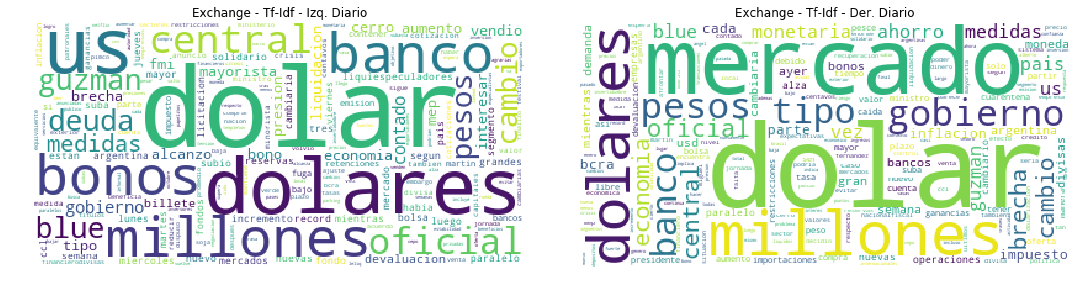

In [56]:
fig, axes = plt.subplots(nrows=1, ncols=2, constrained_layout=True, figsize=(15,30))

cloud = WordCloud(background_color='white')

titles = ['Exchange - Tf-Idf - Izq. Diario', 'Exchange - Tf-Idf - Der. Diario']

for df, ax, title in zip([tfidf_izq_df, tfidf_der_df], axes.flatten(), titles):
    cloud.generate_from_frequencies(df.sum(axis=0).sort_values())
    ax.imshow(cloud)
    ax.set_title(title)
    ax.axis('off')
    
plt.show()

Observation

In both cases, "dolar" is the most important term and it is in obvious relantionship with the central topic of these texts. The term "millones", the following more distintive term on either side, reinforces the idea about why the selected topic, the argentina currency rate of exchange, is something to be talking about. "medidas", "banco" and "cambio" are another important shared words also.

Nevertheless, there are again some terms that are mutually excluded between both clouds and appear to be saying something with semantic value. Meanwhile "bonos" and "deuda" seem to be significant to "izquierda diario"; "mercado" and "gobierno" are the same for "derecha diario".

Looking more closely, "us" and "fmi" are also two minor terms not mentioned by "derecha diario", where we found "ahorro" and "monetaria" are not present in "izquierda diario".